In [17]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2_contingency
import statsmodels.api as sm

ModuleNotFoundError: No module named 'matplotlib.boxplot'

**ЗАДАЧА 1**

In [3]:
df = pd.read_csv('/home/vladimir/Downloads/NHD', sep='\t',index_col=0)

In [9]:
df = df.dropna(how='all', axis='columns')
x = df[df['RURAL'] == 1]['FEXP']
y = df[df['RURAL'] == 0]['FEXP']
x.name, y.name = 'rural', 'not rural'

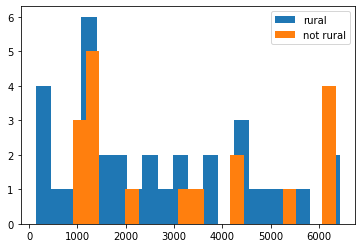

In [37]:
plt.hist(x,bins=20)
plt.hist(y,bins=20)  
plt.legend([x.name, y.name])

In [6]:
res = stats.shapiro(x)
print('p-value: ', res[1])
res = stats.shapiro(y)
print('p-value: ', res[1])

p-value:  0.04017774015665054
p-value:  0.003969315439462662


p-value получилось маленьким для обеих гипотез, следовательно гипотеза нормальности отвергается. Впрочем, и гистограмма не очень напоминает нормальное распределение. Распределение обоих подгрупп не является нормальным.  
Будем использовать гипотезу о равенстве медиан выборок.

Значит, мы не можем руководствоваться средним для сравнения совокупностей. Будем использовать медианы для этого.

Используем критерий Манна-Уитни для независимых выборок. 
Нулевая гипотеза - медианы равны.

In [7]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.26594759448891914


p-value получилось достаточно большим, поэтому у нас нет оснований отвергнуть гипотезу. Вывод: расходы больниц в год отличаются незначимо -- разница медиан в выборках вызвана случайными отклонениями.

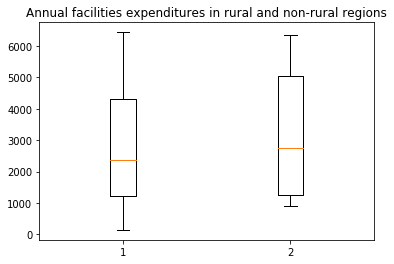

In [24]:
data = [x,y]
a1, a2 = plt.subplots()
a2.set_title('Annual facilities expenditures in rural and non-rural regions')
a2.boxplot(data)

plt.show()

Как видим, оранжевые линии - медианы не значимо отличаются друг от друга.

**ЗАДАЧА 2**

In [28]:
df1 = pd.read_csv('/home/vladimir/Downloads/USL', sep='\t',index_col=0)

In [29]:
df1.head()

,DENS,COMP,RTW,PVT
STATE,,,,
NY,56.9,1,0,31.2
MI,49.6,1,0,30.2
WA,32.4,1,0,33.1
HI,54.6,1,0,24.7
AK,30.7,1,0,30.1


В этих данных нас интересует процент муниципальных служащих, состоящих в профсоюзах - столбец DENS. Проверим, значимо ли влияния закона State right-to-work law (RTW), или нет.

In [40]:
a = df1[df1['RTW'] == 1]['DENS']
b = df1[df1['RTW'] == 0]['DENS']
a.name, b.name = 'State right-to-work law принят', 'State right-to-work law не принят'

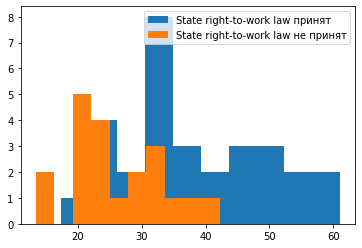

In [48]:
plt.hist(b,bins=10)  
plt.hist(a,bins=10)
plt.legend([a.name, b.name])

In [47]:
res = stats.shapiro(a)
print('p-value: ', res[1])
res = stats.shapiro(b)
print('p-value: ', res[1])

p-value:  0.6463996171951294
p-value:  0.19173066318035126


Значения p-value достаточно большие (больше $\alpha = 0.01, 0.05$), делаем вывод, что распределения незначимо отличаются от нормального. Значит, можно использовать среднее для сравнения центров распределений.


Критерием Флигнера-Килина проверим, равны ли дисперсии.

In [53]:
res = stats.fligner(a, b)
print('p-value: ', res[1])

p-value:  0.12569758439648201


Значение p-value больше уровня значимости 0.05, поэтому гипотезу о равенстве дисперсий не отвергаем. В двух выборках находятся разные  объекты, значит выборки независимые. Вывод: гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=True```.

In [54]:
res = stats.ttest_ind(a, b, equal_var=True)
print('p-value: ', res[1])

p-value:  9.287017631717846e-05


Значения p-value достаточно мало (меньше $\alpha = 0.01, 0.05$), делаем вывод, что центры распределений отличаются.

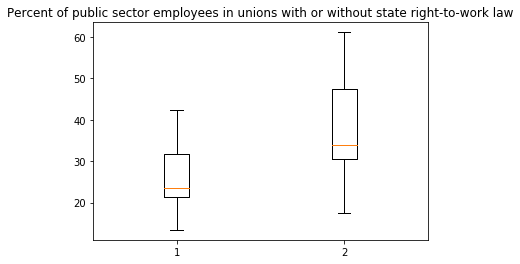

In [57]:
data = [a,b]
a1, a2 = plt.subplots()
a2.set_title('Percent of public sector employees in unions with or without state right-to-work law')
a2.boxplot(data)

plt.show()

Boxplot показывает разницу наглядно, заметно, что в штатах, где принят закон, процент муниципальных служащих выше.
Проверка гипотезы подтвердила, что это разница значима.